<a href="https://colab.research.google.com/github/hemanthreddy-1711/Data-Mining-Project-Unstoppable/blob/main/Data_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Supercharge Locations.csv',encoding='cp1252')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Display the first few rows
data.head()

,Supercharger,Street Address,City,State,Zip,Country,Stalls,kW,GPS,Elev(m),Open Date
0,"Buellton, CA",555 McMurray Rd,Buellton,CA,93427,USA,10,150.0,"34.61456, -120.188387",114,7/13/2013
1,"Corning, CA",950 Hwy 99,Corning,CA,96021,USA,6,150.0,"39.926454, -122.198393",87,10/18/2013
2,"Barstow, CA",2812 Lenwood Rd,Barstow,CA,92311,USA,16,150.0,"34.849129, -117.085446",725,11/19/2012
3,"Tifton, GA",1310 U.S. 82,Tifton,GA,31794,USA,8,150.0,"31.448847, -83.53221",92,7/10/2014
4,"Roseville, CA",1151 Galleria Blvd,Roseville,CA,95678,USA,7,150.0,"38.771208, -121.266149",66,4/29/2014


In [ ]:
# Dataset structure
data.info()

# Summary statistics for numerical columns
data.describe()

# Summary statistics for categorical columns
data.describe(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Supercharger    5876 non-null   object 
 1   Street Address  5876 non-null   object 
 2   City            5876 non-null   object 
 3   State           5754 non-null   object 
 4   Zip             3947 non-null   object 
 5   Country         5876 non-null   object 
 6   Stalls          5876 non-null   int64  
 7   kW              5870 non-null   float64
 8   GPS             5876 non-null   object 
 9   Elev(m)         5876 non-null   int64  
 10  Open Date       5126 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 505.1+ KB


,Supercharger,Street Address,City,State,Zip,Country,GPS,Open Date
count,5876,5876,5876,5754,3947,5876,5876,5126
unique,5876,5856,3452,427,3518,48,5874,1785
top,"Buellton, CA","Località Autoporto, 33B",Shanghai,CA,94403,USA,"29.79678431, 119.71462154",1/22/2021
freq,1,3,181,496,5,2264,2,459


In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

,0
State,122
Zip,1929
kW,6
Open Date,750


In [ ]:
# adding data to missing values
data['kW'] = data['kW'].fillna(data['kW'].mean())


data['State'] = data['State'].fillna(data['State'].mode()[0])
data['Zip'] = data['Zip'].fillna(data['Zip'].mode()[0])


data['Open Date'] = pd.to_datetime(data['Open Date'], errors='coerce')


data['Open Date'] = data['Open Date'].fillna(data['Open Date'].mode()[0])


# Check for missing values
missing_data = data.isnull().sum()

# Filter out columns with missing values
missing_data = missing_data[missing_data > 0]

if missing_data.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values detected:")
    print(missing_data)

No missing values in the dataset.


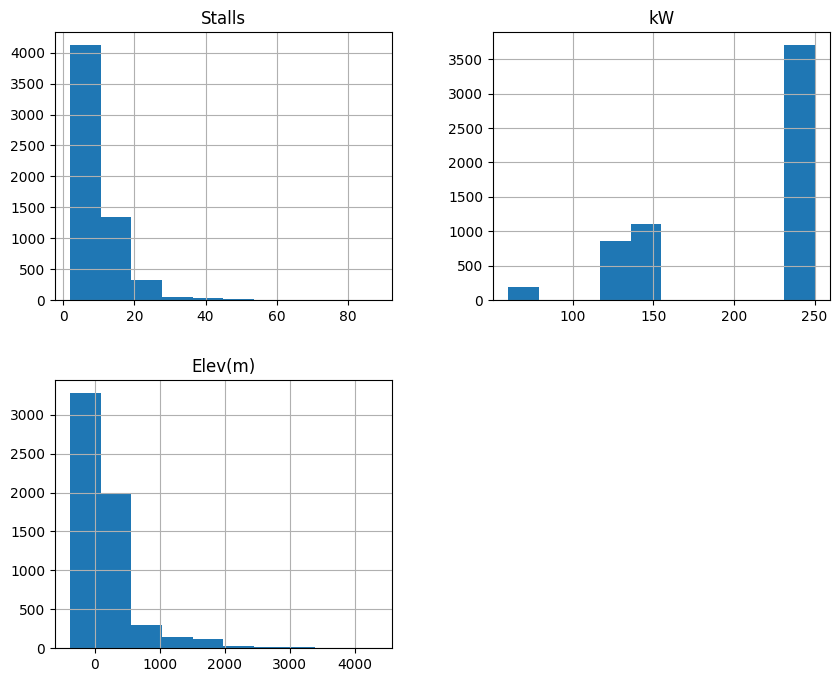

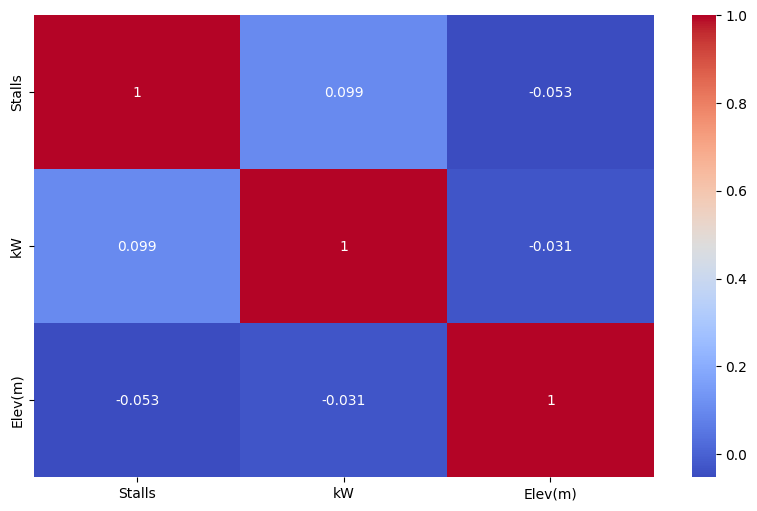

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Select only numerical features for correlation
numerical_data = data.select_dtypes(include=np.number)

# Histogram for numerical columns
numerical_data.hist(figsize=(10, 8))
plt.show()

# Correlation Heatmap for numerical features only
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

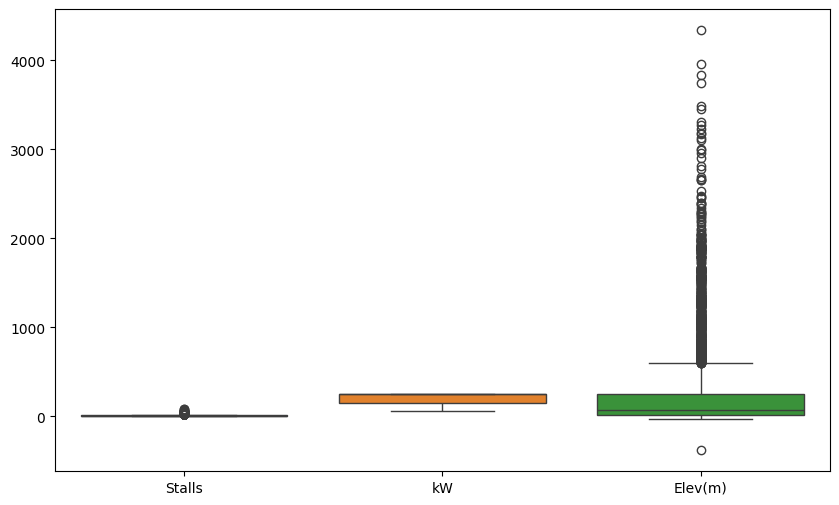

In [ ]:
# Box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()


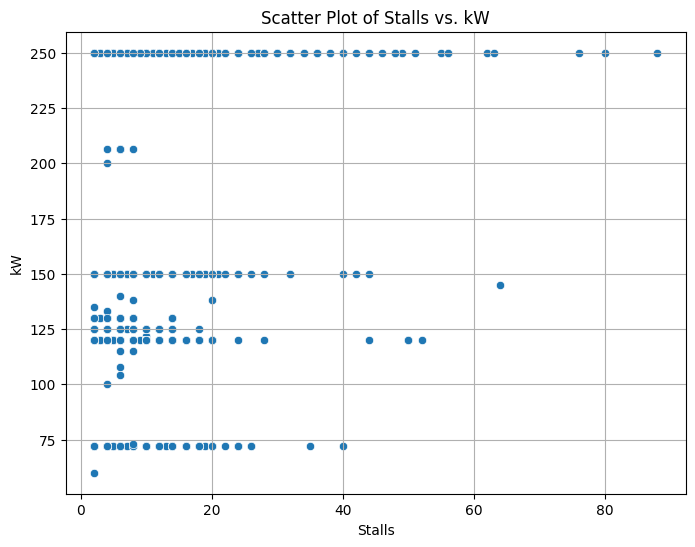

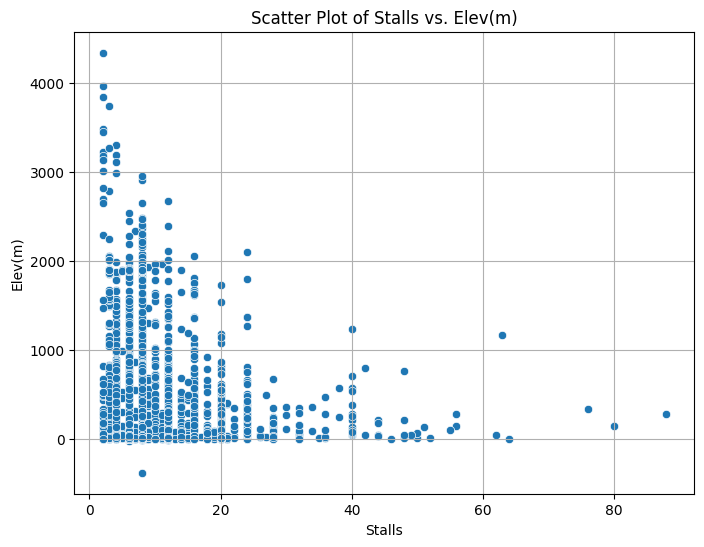

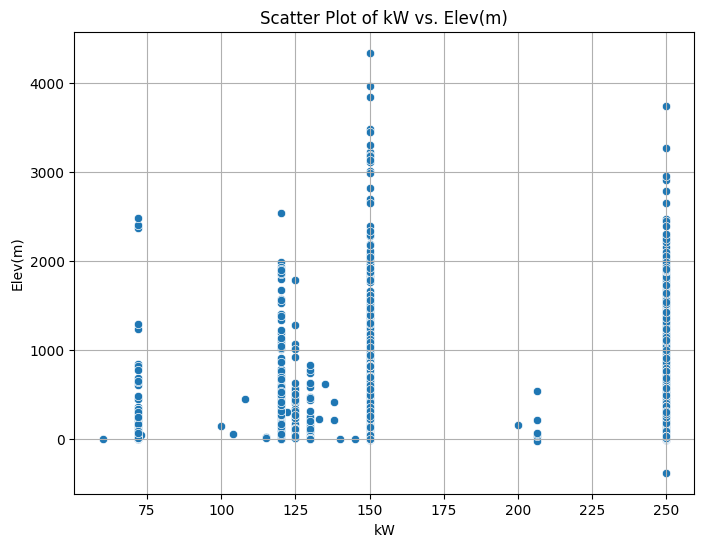

In [ ]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

# Create scatter plots for all pairs of numerical features
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        col1 = numerical_columns[i]
        col2 = numerical_columns[j]

        plt.figure(figsize=(8, 6))  # Adjust figure size as needed
        sns.scatterplot(data=data, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs. {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.grid(True)
        plt.show()

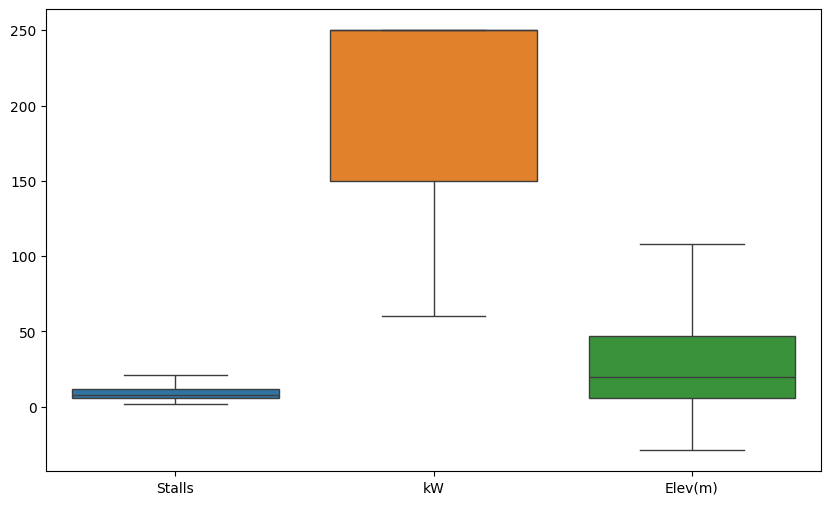

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cols_to_check = ['Stalls','kW','Elev(m)']

# Create a copy of the original DataFrame to avoid modifying it directly
data_filtered = data.copy()

for i in range(25):
  for col in cols_to_check:
      # Calculate quartiles (IQR)
      q1 = data_filtered[col].quantile(0.25)
      q3 = data_filtered[col].quantile(0.75)
      iqr = q3 - q1

      # Create a threshold for outlier detection (1.5 times IQR)
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr

      # Filter outliers based on thresholds
      data_filtered = data_filtered[(data_filtered[col] >= lower_bound) & (data_filtered[col] <= upper_bound)]


plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered) # Use data_filtered for plotting
plt.show()

In [ ]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data_filtered, drop_first=True)

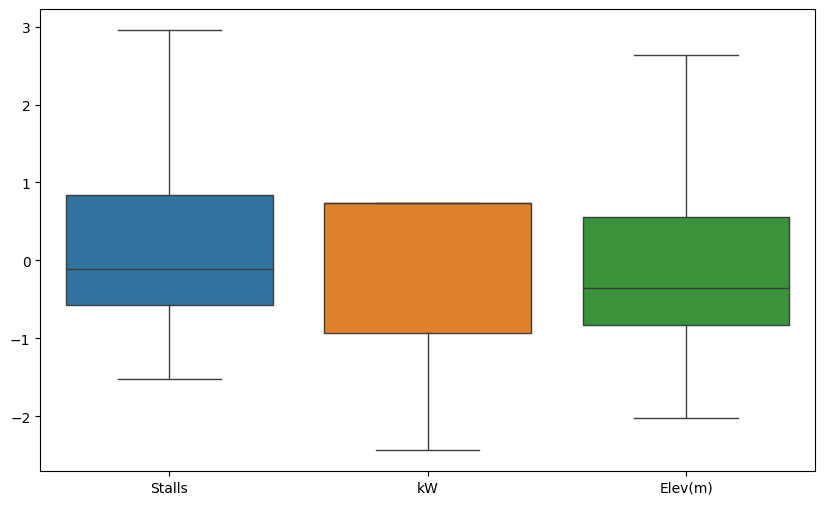

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features
scaler = StandardScaler()
numerical_columns = data_filtered.select_dtypes(include=['float64', 'int64']).columns
data_filtered[numerical_columns] = scaler.fit_transform(data_filtered[numerical_columns])
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtered) # Use data_filtered for plotting
plt.show()

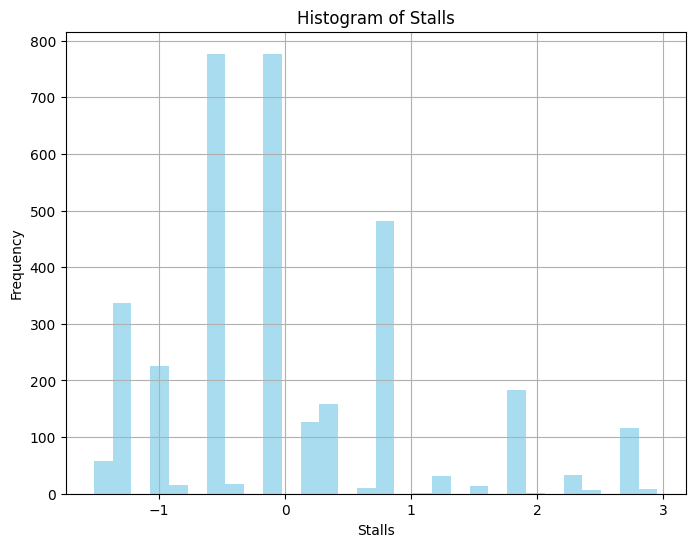

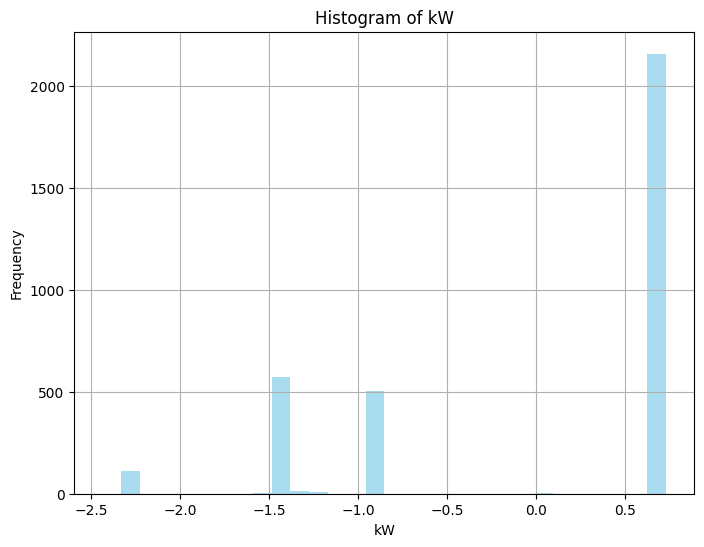

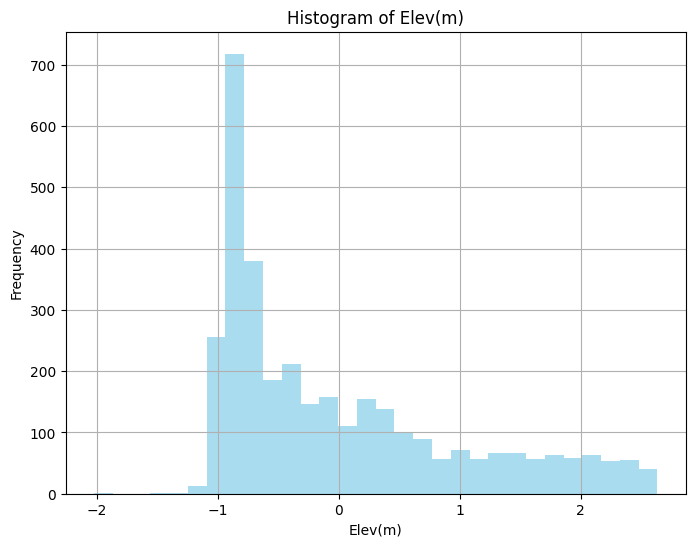

In [ ]:
# Select only numerical columns
numerical_columns = data_filtered.select_dtypes(include=np.number).columns.tolist()

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data_filtered[column], bins=30, color='skyblue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show() # Display each histogram separately

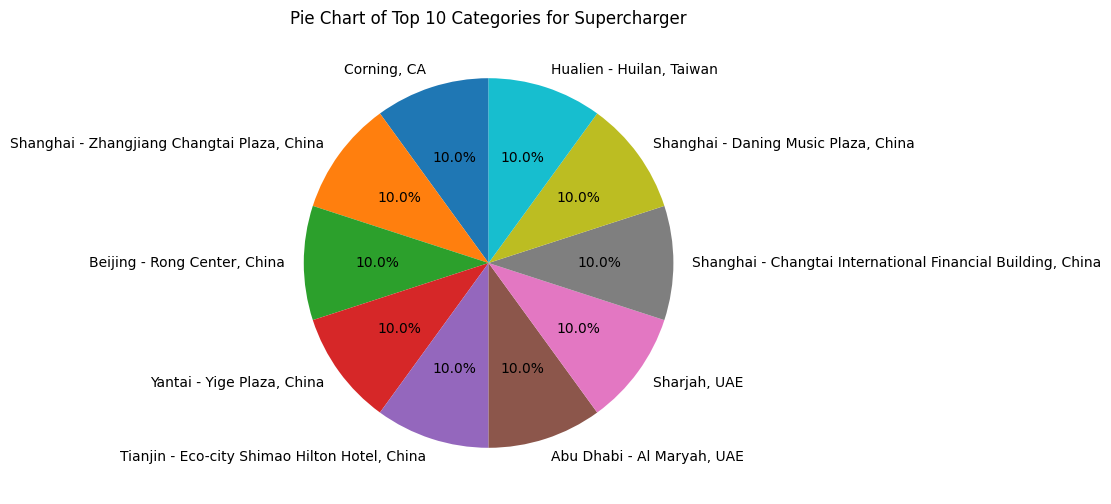

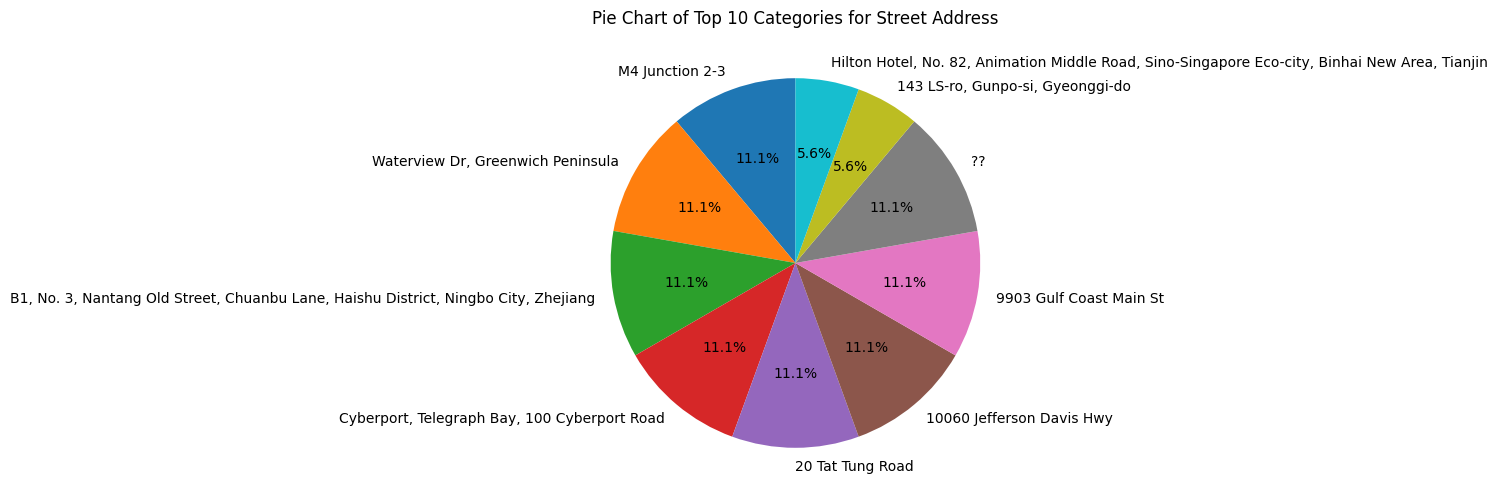

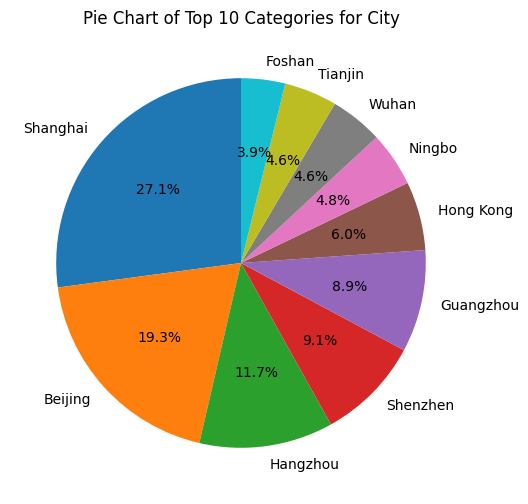

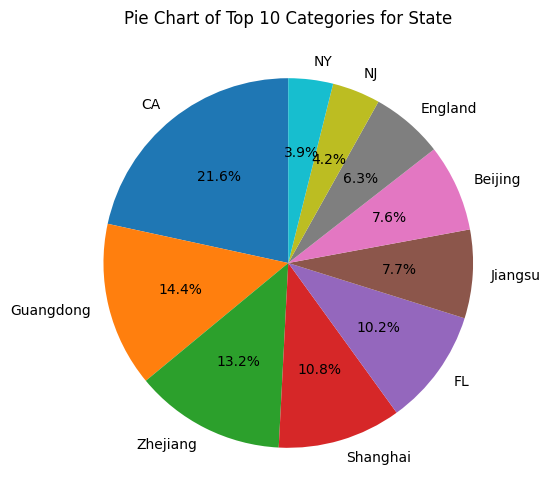

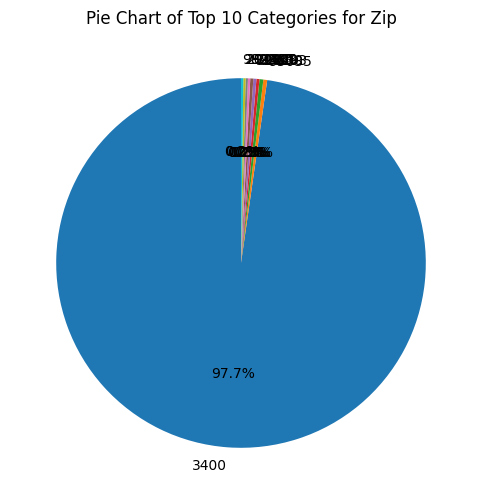

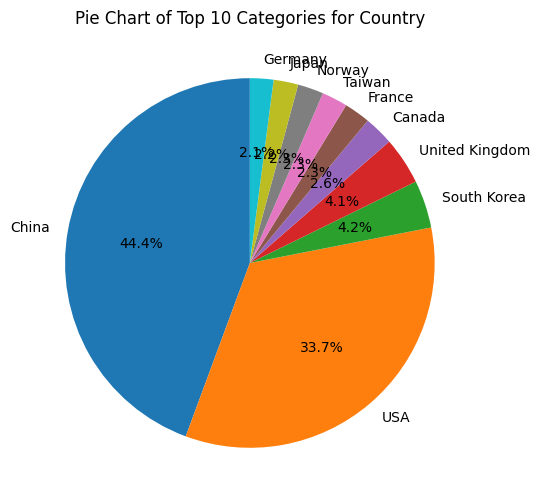

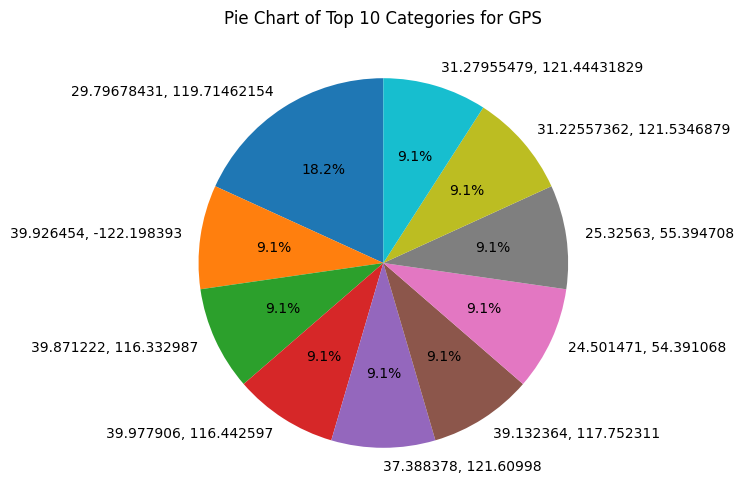

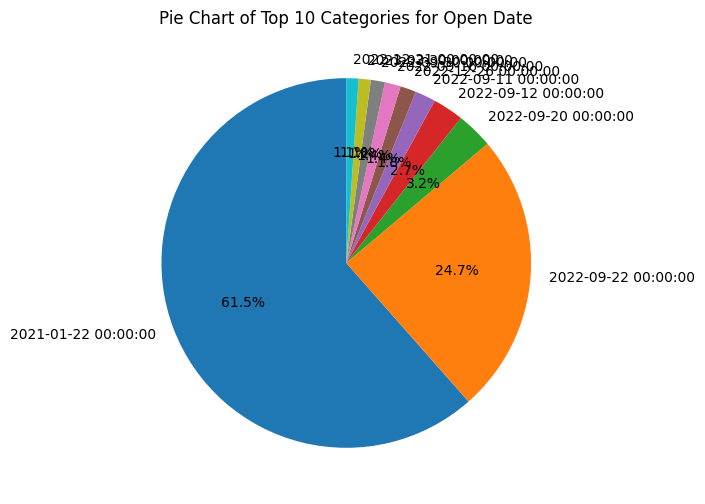

In [ ]:
categorical_columns = data_filtered.select_dtypes(exclude=np.number).columns.tolist()
for column in categorical_columns:
  plt.figure(figsize=(8, 6))
  state_counts = data_filtered[column].value_counts()

  top_n = 10
  state_counts = state_counts.nlargest(top_n)

  plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
  plt.title(f'Pie Chart of Top {top_n} Categories for {column}')
  plt.show()

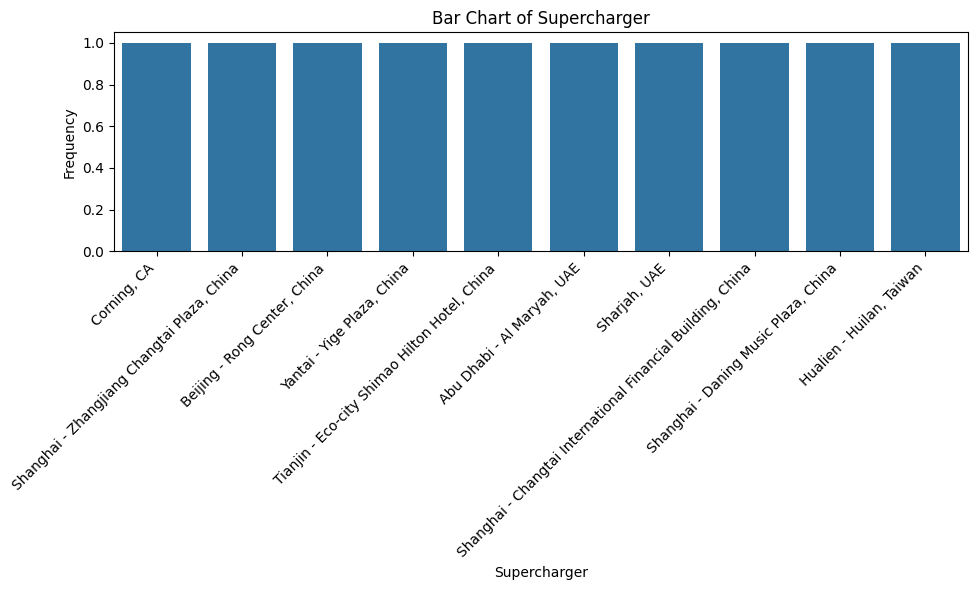

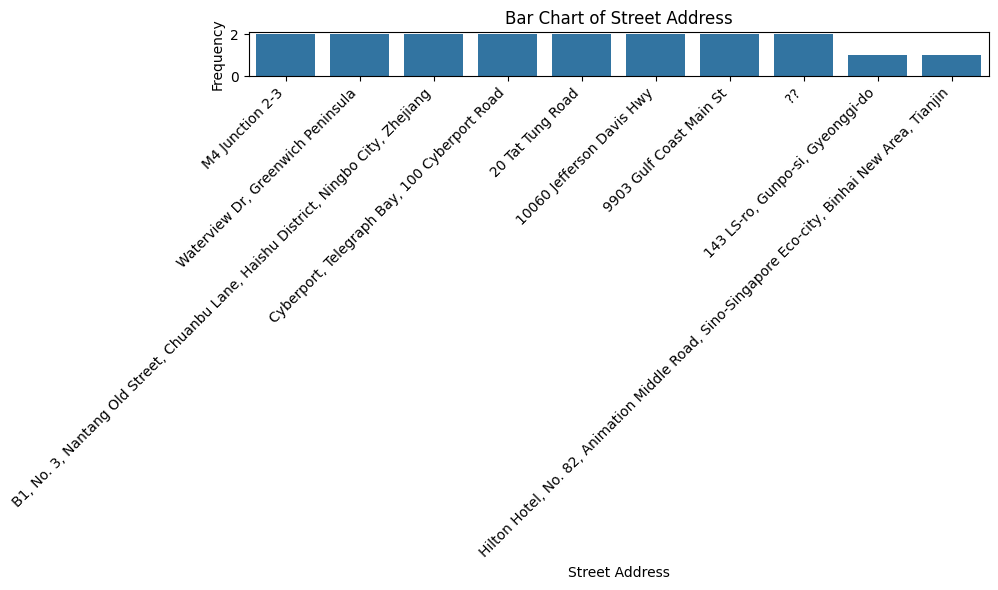

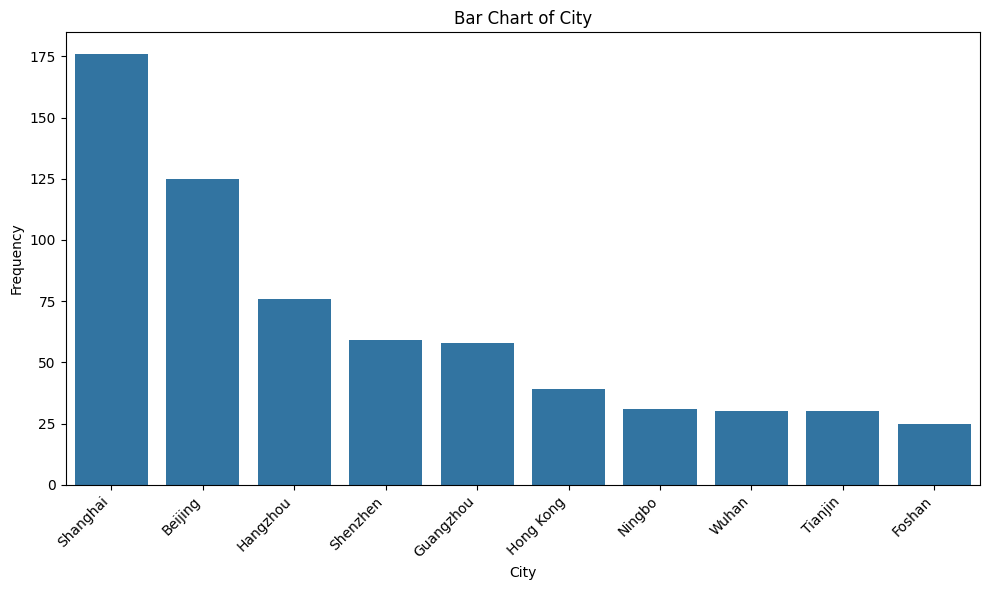

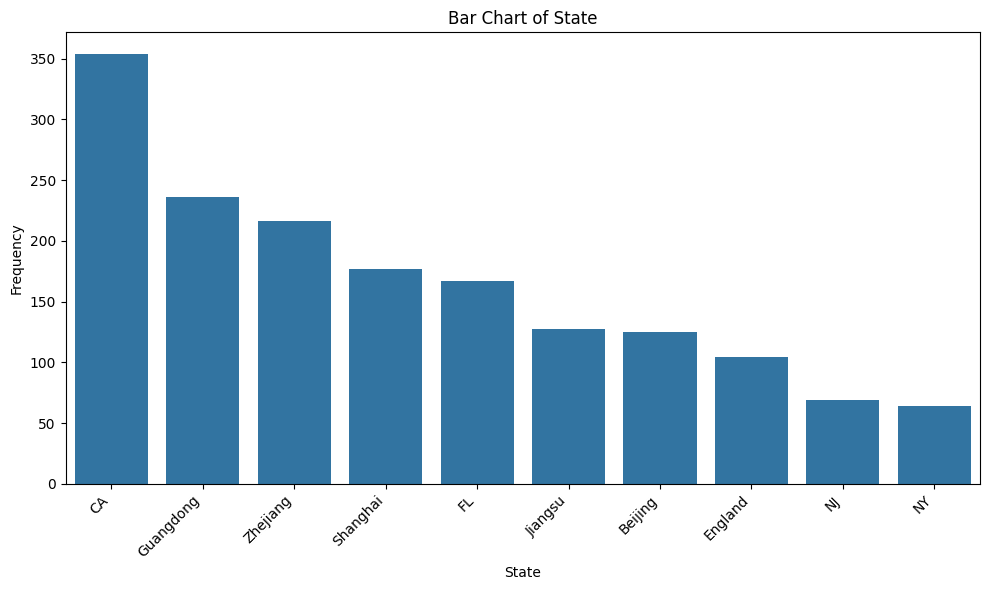

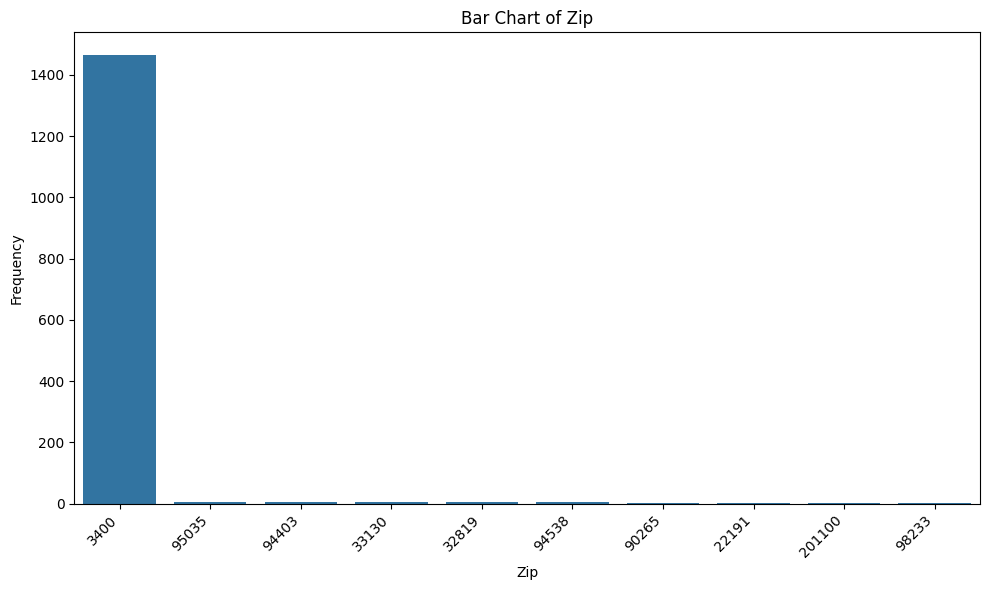

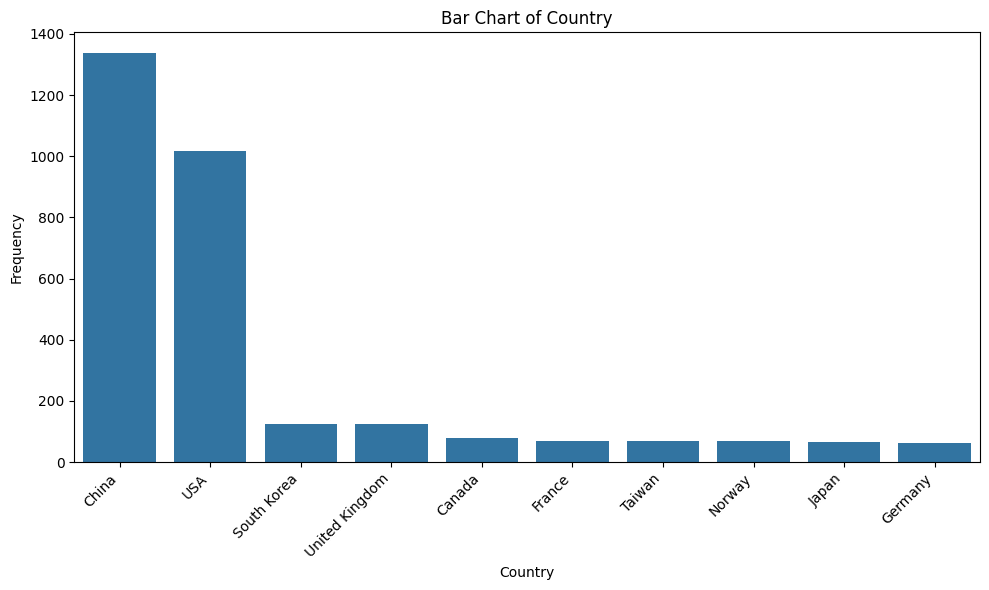

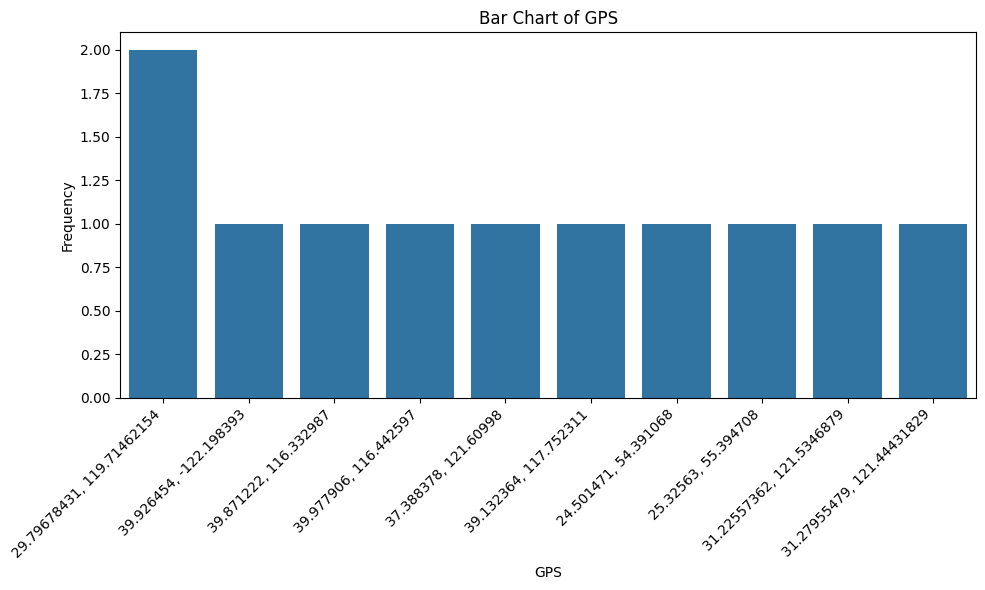

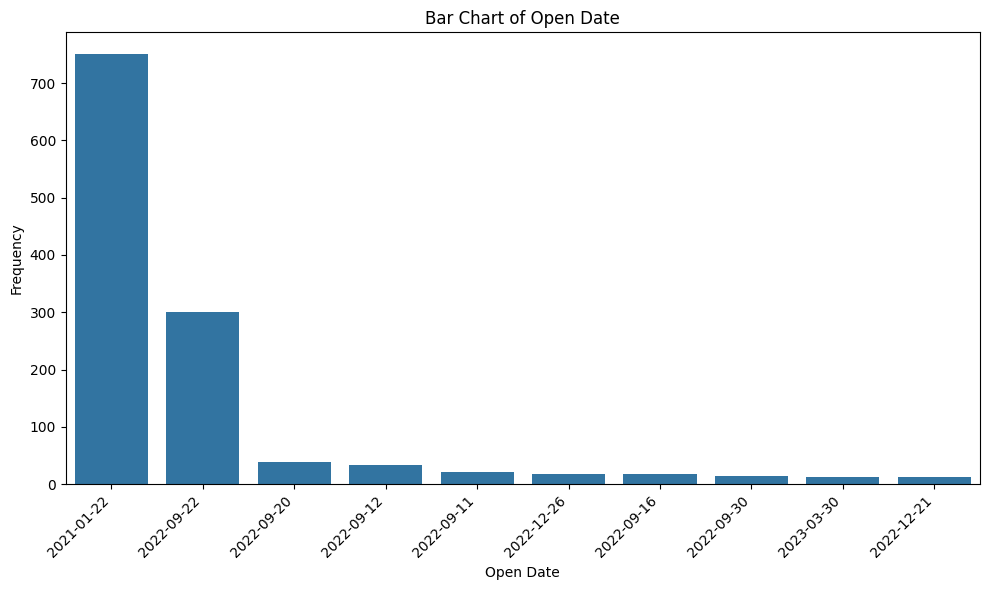

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Get value counts and limit to top categories (optional)
    value_counts = data_filtered[column].value_counts()
    top_n = 10  # You can adjust this or remove the limiting logic
    value_counts = value_counts.nlargest(top_n)

    # Create the bar plot using seaborn
    sns.countplot(data=data_filtered, x=column, order=value_counts.index)

    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# **Data Modoling**

### Decesion Tree

# Preprocess the data according to the requirements

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset with explicit encoding
df = pd.read_csv('Supercharge Locations.csv', encoding='latin1')

# Print initial data info
print("Initial dataset shape:", df.shape)
print("\nInitial columns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())

# Data preprocessing
def preprocess_data(df):
    print("\nStarting preprocessing...")

    # Create a copy of the dataframe
    df_processed = df.copy()

    # Print number of rows before processing
    print(f"Rows before processing: {len(df_processed)}")

    # Handle GPS coordinates
    if 'GPS' in df_processed.columns:
        try:
            # Extract latitude and longitude
            df_processed[['Latitude', 'Longitude']] = df_processed['GPS'].str.extract(r'([-\d.]+),\s*([-\d.]+)')
            df_processed[['Latitude', 'Longitude']] = df_processed[['Latitude', 'Longitude']].astype(float)
            print("GPS coordinates processed successfully")
        except Exception as e:
            print(f"Error processing GPS coordinates: {e}")

    # Convert Open Date to datetime
    if 'Open Date' in df_processed.columns:
        df_processed['Open Date'] = pd.to_datetime(df_processed['Open Date'], errors='coerce')
        df_processed['Year'] = df_processed['Open Date'].dt.year
        print("Date processing completed")

    # Encode categorical variables
    categorical_columns = ['Country', 'State']
    le = LabelEncoder()
    for col in categorical_columns:
        if col in df_processed.columns:
            df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col].fillna('Unknown'))
    print("Categorical encoding completed")

    # Select features for modeling
    features = ['Stalls', 'kW', 'Latitude', 'Longitude']
    if 'Elev(m)' in df_processed.columns:
        features.append('Elev(m)')
    features.extend(['Country_encoded', 'State_encoded', 'Year'])

    # Check which features are actually present
    available_features = [f for f in features if f in df_processed.columns]
    print("\nAvailable features:", available_features)

    # Remove rows with NaN values in selected features
    df_clean = df_processed[available_features].dropna()

    print(f"Rows after processing: {len(df_clean)}")

    return df_clean

# Prepare data for modeling
def prepare_data(df_clean):
    print("\nPreparing data for modeling...")
    print(f"Input data shape: {df_clean.shape}")

    # Define features and target
    target_col = 'kW'
    if target_col not in df_clean.columns:
        raise ValueError(f"Target column '{target_col}' not found in dataset")

    X = df_clean.drop([target_col], axis=1)
    y = df_clean[target_col]

    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Process the data
print("\nStarting data processing...")
df_clean = preprocess_data(df)

# Check if we have enough data
if len(df_clean) < 2:
    raise ValueError("Not enough data after preprocessing")

X_train_scaled, X_test_scaled, y_train, y_test = prepare_data(df_clean)

Initial dataset shape: (5876, 12)

Initial columns: ['Supercharger', 'Street Address', 'City', 'State', 'Zip', 'Country', 'Stalls', 'kW', 'GPS', 'Elev(m)', 'Open Date', 'Unnamed: 11']

Missing values:
 Supercharger         0
Street Address       0
City                 0
State              122
Zip               1929
Country              0
Stalls               0
kW                   6
GPS                  0
Elev(m)              0
Open Date          750
Unnamed: 11       5876
dtype: int64

Starting data processing...

Starting preprocessing...
Rows before processing: 5876
GPS coordinates processed successfully
Date processing completed
Categorical encoding completed

Available features: ['Stalls', 'kW', 'Latitude', 'Longitude', 'Elev(m)', 'Country_encoded', 'State_encoded', 'Year']
Rows after processing: 5121

Preparing data for modeling...
Input data shape: (5121, 8)
Features shape: (5121, 7)
Target shape: (5121,)


# Decesion tree

Decision Tree Results:
Accuracy: 0.8450
R2 Score: 0.6374
MSE: 1394.6424


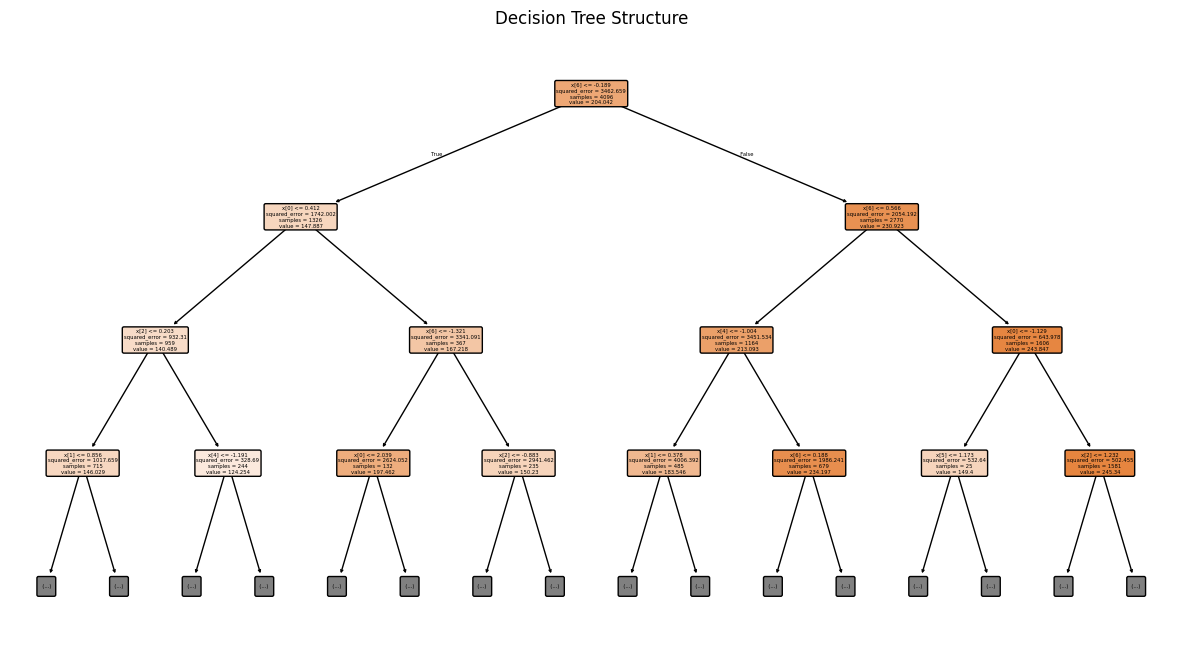


Cross-Validation Results:
CV Scores: [0.60038999 0.65819173 0.59183174 0.64159387 0.60644079]
Mean CV Score: 0.6197
CV Score Std: 0.0256


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=50,max_depth=6,min_samples_split=3,min_samples_leaf=3)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test_scaled)

# Calculate accuracy metrics
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_accuracy = 1 - (abs(y_test - dt_pred) / y_test).mean()

print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"R2 Score: {dt_r2:.4f}")
print(f"MSE: {dt_mse:.4f}")

# Simplified version
plt.figure(figsize=(15,8))
plot_tree(dt_model,
        max_depth=3,
        filled=True,
        rounded=True)
plt.title("Decision Tree Structure")
plt.show()

from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print("\nCross-Validation Results:")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"CV Score Std: {cv_scores.std():.4f}")


Gradient Boosting Results:
Accuracy: 0.8602
R2 Score: 0.7336
MSE: 1024.6468


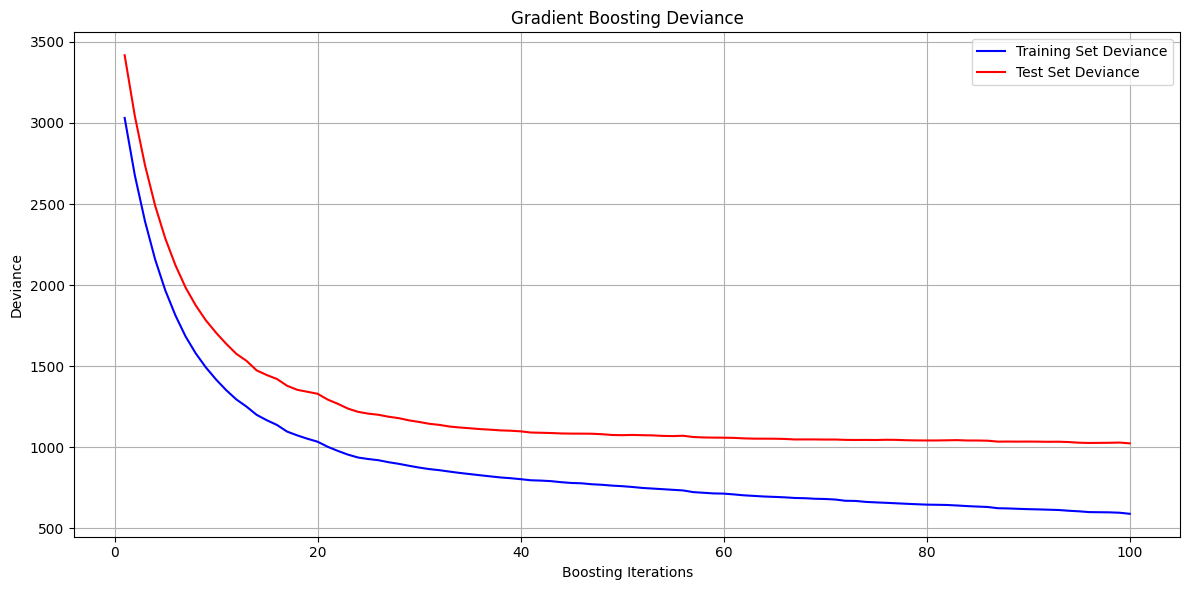

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train gradient boosting model
gb = GradientBoostingRegressor(
  n_estimators=100,
  learning_rate=0.1,
  max_depth=5,
  random_state=42
)
gb.fit(X_train_scaled, y_train)

# Make predictions
gb_pred = gb.predict(X_test_scaled)

# Calculate metrics
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_accuracy = 1 - (abs(y_test - gb_pred) / y_test).mean()

print("\nGradient Boosting Results:")
print(f"Accuracy: {gb_accuracy:.4f}")
print(f"R2 Score: {gb_r2:.4f}")
print(f"MSE: {gb_mse:.4f}")

test_score = np.zeros((100,), dtype=np.float64)
for i, y_pred in enumerate(gb.staged_predict(X_test_scaled)):
  # Use mean_squared_error instead of gb.loss_
  test_score[i] = mean_squared_error(y_test, y_pred)


plt.figure(figsize=(12, 6))
plt.plot(np.arange(100) + 1, gb.train_score_, 'b-',
       label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',
       label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.title('Gradient Boosting Deviance')
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest

Random Forest Results:
Accuracy: 0.8824
R2 Score: 0.7406
MSE: 997.7044


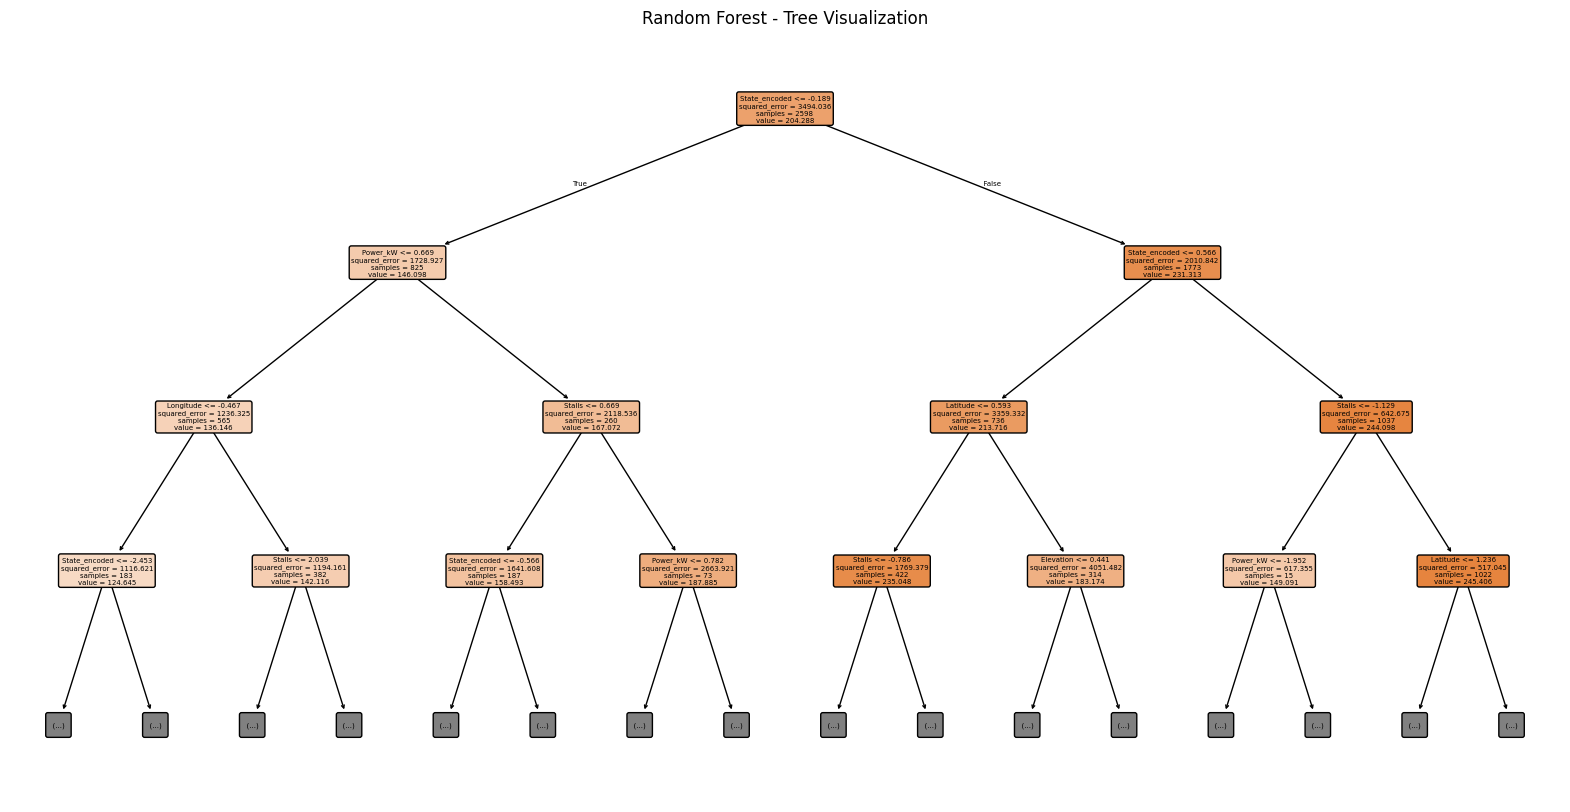

In [ ]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy metrics
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_accuracy = 1 - (abs(y_test - rf_pred) / y_test).mean()

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"R2 Score: {rf_r2:.4f}")
print(f"MSE: {rf_mse:.4f}")

# Assuming 'features' is a list containing the original feature names (from your global variables)
plt.figure(figsize=(20, 10))

plot_tree(rf_model.estimators_[0],
          feature_names=features,  # Use the 'features' list instead of X_train_scaled.columns
          filled=True,
          rounded=True,
          max_depth=3)

plt.title("Random Forest - Tree Visualization")
plt.show()

# Support Vector Machine

SVM Results:
Accuracy: 0.7359
R2 Score: 0.3003
MSE: 2691.5759


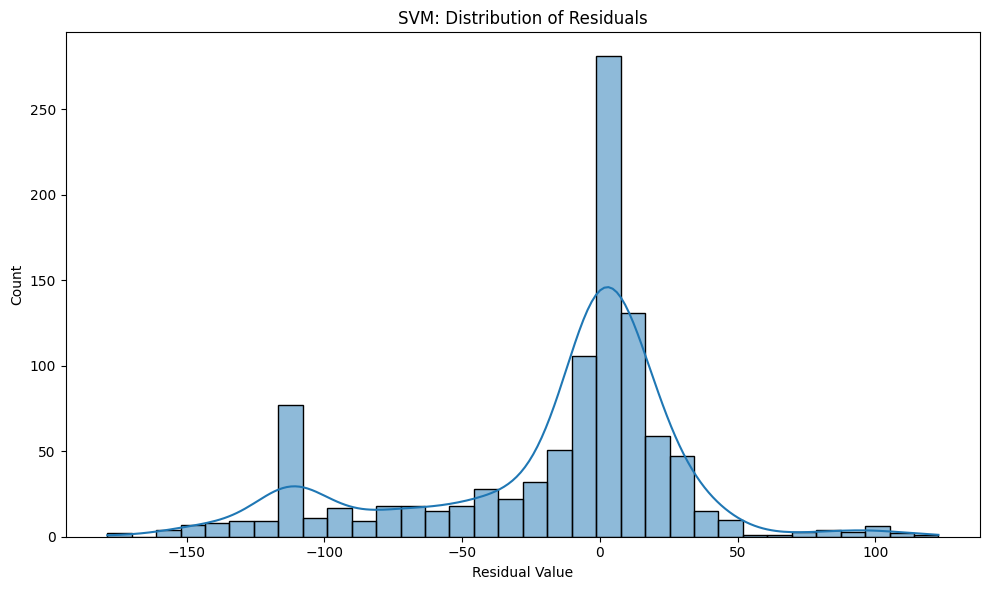

In [ ]:
from sklearn.svm import SVR

# Train SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy metrics
svm_mse = mean_squared_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)
svm_accuracy = 1 - (abs(y_test - svm_pred) / y_test).mean()

print("SVM Results:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"R2 Score: {svm_r2:.4f}")
print(f"MSE: {svm_mse:.4f}")

# Plot Error Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('SVM: Distribution of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy metrics
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_accuracy = 1 - (abs(y_test - lr_pred) / y_test).mean()

print("Linear Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"R2 Score: {lr_r2:.4f}")
print(f"MSE: {lr_mse:.4f}")

Linear Regression Results:
Accuracy: 0.7305
R2 Score: 0.3547
MSE: 2482.1924


# Naive Bayes model

Naive Bayes Results:
Accuracy: 0.8146
R2 Score: 0.1566
MSE: 3244.4127


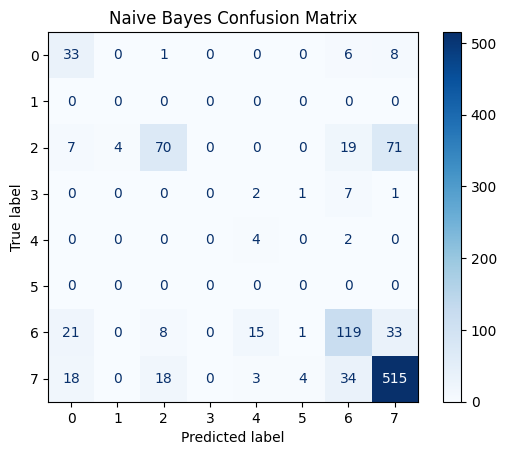

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test_scaled)

# Calculate accuracy metrics
nb_mse = mean_squared_error(y_test, nb_pred)
nb_r2 = r2_score(y_test, nb_pred)
nb_accuracy = 1 - (abs(y_test - nb_pred) / y_test).mean()

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy:.4f}")
print(f"R2 Score: {nb_r2:.4f}")
print(f"MSE: {nb_mse:.4f}")

cm = confusion_matrix(y_test, nb_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Nurel Network

Neural Network Results:
Accuracy: 0.8366
R2 Score: 0.6408
MSE: 1381.8375


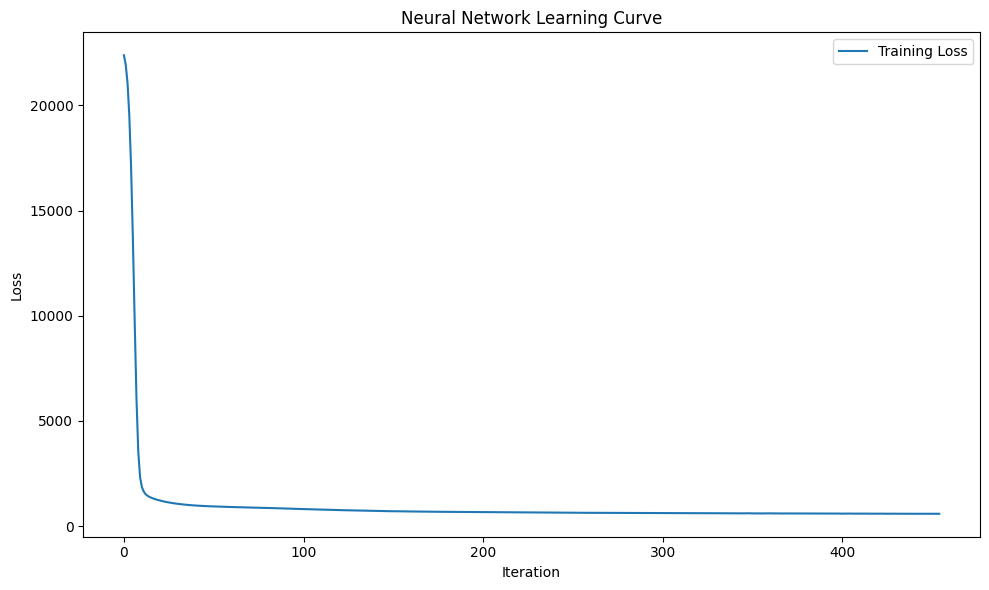

In [ ]:
from sklearn.neural_network import MLPRegressor

# Train Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
nn_model.fit(X_train_scaled, y_train)

# Make predictions
nn_pred = nn_model.predict(X_test_scaled)

# Calculate accuracy metrics
nn_mse = mean_squared_error(y_test, nn_pred)
nn_r2 = r2_score(y_test, nn_pred)
nn_accuracy = 1 - (abs(y_test - nn_pred) / y_test).mean()

print("Neural Network Results:")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"R2 Score: {nn_r2:.4f}")
print(f"MSE: {nn_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(nn_model.loss_curve_, label='Training Loss')
plt.title('Neural Network Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()